In [1]:
import json

import shapely.geometry
from geopandas_osm import osm
from shapely.geometry import shape

from shapely.wkt import loads

import pandas as pd
import json

import geojson
import geopandas as gpd
from geojson import Feature, Point, FeatureCollection

In [2]:
wkt = pd.read_csv('../wkt_data/train_wkt_v4.csv', sep = ',')#, engine='python')

In [3]:
poly = wkt.MultipolygonWKT.values[3]

In [4]:
o = {
   "coordinates": [[[23.314208, 37.768469], [24.039306, 37.768469], [24.039306, 38.214372], [23.314208, 38.214372], [23.314208, 37.768469]]], 
   "type": "Polygon"
}

s = json.dumps(o)

# Convert to geojson.geometry.Polygon
g1 = geojson.loads(s)

# Feed to shape() to convert to shapely.geometry.polygon.Polygon
# This will invoke its __geo_interface__ (https://gist.github.com/sgillies/2217756)
g2 = shape(g1)

# Now it's very easy to get a WKT/WKB representation
g2.wkt
g2.wkb

b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00\x00\x00>$|\xefoP7@\xb3~31]\xe2B@]\x89@\xf5\x0f\n8@\xb3~31]\xe2B@]\x89@\xf5\x0f\n8@\xcc\x96\xac\x8ap\x1bC@>$|\xefoP7@\xcc\x96\xac\x8ap\x1bC@>$|\xefoP7@\xb3~31]\xe2B@'

In [5]:
my_feature = Feature(geometry=g2)

In [6]:
collection = FeatureCollection([my_feature])

In [7]:
col = gpd.GeoDataFrame.from_features(collection['features'])
col

,geometry
0,"POLYGON ((23.314208 37.768469, 24.039306 37.76..."


In [8]:
collection['features']

[{"geometry": {"coordinates": [[[23.314208, 37.768469], [24.039306, 37.768469], [24.039306, 38.214372], [23.314208, 38.214372], [23.314208, 37.768469]]], "type": "Polygon"}, "properties": {}, "type": "Feature"}]

In [9]:
col.geometry.values[0].exterior.coords.xy

(array('d', [23.314208, 24.039306, 24.039306, 23.314208, 23.314208]),
 array('d', [37.768469, 37.768469, 38.214372, 38.214372, 37.768469]))

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


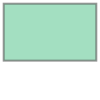

In [10]:
col.ix[0].geometry

In [ ]:
df = osm.query_osm('way', col.ix[0].geometry, recurse='down', tags='highway')
roads = df[df.type == 'LineString'][['highway', 'name', 'geometry']]

In [ ]:
roads.head()

In [11]:
import math

In [12]:
def tile2long(x,z):
    return (x/math.pow(2,z)*360-180)

def tile2lat(y,z):
    n=Math.PI-2*math.PI*y/math.pow(2,z)
    return (180/math.PI*math.atan(0.5*(math.exp(n)-math.exp(-n))))

In [ ]:
tile2long

# Test

In [ ]:
base_lat = 23.5304318
base_lon = 38.0572542

o = {
    "coordinates": [[[base_lat, base_lon], [base_lat + 0.001, base_lon], [base_lat + 0.001, base_lon + 0.001],
                     [base_lat, base_lon + 0.001], [base_lat, base_lon]]],
    "type": "Polygon"
}

s = json.dumps(o)
g1 = geojson.loads(s)
g2 = shape(g1)

my_feature = Feature(geometry=g2)
collection = FeatureCollection([my_feature])
col = gpd.GeoDataFrame.from_features(collection['features'])

In [ ]:
df = osm.query_osm('way', col.ix[0].geometry, recurse='down', tags='highway')

In [ ]:
list(df.geometry.values)

In [ ]:
import ast


In [ ]:
ast.literal_eval(geojson.dumps(shapely.geometry.mapping(df.geometry.values[0])))

In [ ]:
[ast.literal_eval(geojson.dumps(shapely.geometry.mapping(x))) for x in df.geometry.values]

In [ ]:
str(df.geometry.values[0])

In [ ]:
# wkt = df[df.type == 'LineString'][['highway', 'name', 'geometry']]

# Overpass

In [ ]:
import overpass
api = overpass.API()
response = api.get('node["name"="Salt Lake City"]')

In [ ]:
response